In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json


In [10]:
print("Calculating standard tables")
default_table = list()
for processorCount in [1, 2, 4, 6, 8, 10, 12, 14, 16]:
    with open(f"temp_result_data/json/result-1-{processorCount}.json") as json_data_file:
        jdata = json.load(json_data_file)
    t_p_durations = list()
    for row_data in jdata:
        if 'ITER' in row_data:  # skip info line
            continue
        # print(row_data)
        durations = list()
        for i_duration_data in row_data[2:]:
            durations.append(float(i_duration_data)) # append current duration
        t_p_i = max(durations)
        t_p_durations.append(t_p_i)
    t_p = np.average(t_p_durations)

    if processorCount == 1:
        baseDuration = t_p
        acceleration = 1
        efficiency = 1
    else:
        acceleration = baseDuration / t_p
        efficiency = acceleration / processorCount
    default_table.append([processorCount, t_p, acceleration, efficiency])
    print(f"T_{processorCount}\t| {t_p}\t| {acceleration}\t| {efficiency}")

# view table
table_to_view = dict()
table_to_view["Количество процессоров"] = list()
table_to_view["Время работы"] = list()
table_to_view["Ускорение вычислений"] = list()
table_to_view["Эффективность вычислений"] = list()

for (processorNum, processorWorkTime, acceleration, efficiency) in default_table:
    table_to_view["Количество процессоров"].append(processorNum)
    table_to_view["Время работы"].append(processorWorkTime)
    table_to_view["Ускорение вычислений"].append(acceleration)
    table_to_view["Эффективность вычислений"].append(efficiency)
pd.DataFrame.from_dict(table_to_view)


Calculating standard tables
T_1	| 9771.05	| 1	| 1
T_2	| 6132.38	| 1.5933536408376519	| 0.7966768204188259
T_4	| 2942.78	| 3.3203467469535606	| 0.8300866867383901
T_6	| 2314.0	| 4.222579948141745	| 0.7037633246902909
T_8	| 1699.66	| 5.748826235835402	| 0.7186032794794253
T_10	| 1407.59	| 6.941687565271137	| 0.6941687565271137
T_12	| 997.21	| 9.798387501128147	| 0.8165322917606789
T_14	| 983.35	| 9.936492601820307	| 0.7097494715585934
T_16	| 808.81	| 12.080772987475427	| 0.7550483117172142


,Количество процессоров,Время работы,Ускорение вычислений,Эффективность вычислений
0,1,9771.05,1.000000,1.000000
1,2,6132.38,1.593354,0.796677
2,4,2942.78,3.320347,0.830087
3,6,2314.00,4.222580,0.703763
4,8,1699.66,5.748826,0.718603
5,10,1407.59,6.941688,0.694169
6,12,997.21,9.798388,0.816532
7,14,983.35,9.936493,0.709749
8,16,808.81,12.080773,0.755048


In [11]:
print("Calculating optimized tables")
efficient_table = list()
for processorCount in [1, 2, 4, 6, 8, 10, 12, 14, 16]:
    with open(f"temp_result_data/json/result-2-{processorCount}.json") as json_data_file:
        jdata = json.load(json_data_file)
    t_p_durations = list()
    for row_data in jdata:
        if 'ITER' in row_data:  # skip info line
            continue
        # print(row_data)
        durations = list()
        for i_duration_data in row_data[2:]:
            durations.append(float(i_duration_data)) # append current duration
        t_p_i = max(durations)
        t_p_durations.append(t_p_i)
    t_p = np.average(t_p_durations)

    if processorCount == 1:
        baseDuration = t_p
        acceleration = 1
        efficiency = 1
    else:
        acceleration = baseDuration / t_p
        efficiency = acceleration / processorCount
    efficient_table.append([processorCount, t_p, acceleration, efficiency])
    print(f"T_{processorCount}\t| {t_p}\t| {acceleration}\t| {efficiency}")

# view table
table_to_view = dict()
table_to_view["Количество процессоров"] = list()
table_to_view["Время работы"] = list()
table_to_view["Ускорение вычислений"] = list()
table_to_view["Эффективность вычислений"] = list()

for (processorNum, processorWorkTime, acceleration, efficiency) in efficient_table:
    table_to_view["Количество процессоров"].append(processorNum)
    table_to_view["Время работы"].append(processorWorkTime)
    table_to_view["Ускорение вычислений"].append(acceleration)
    table_to_view["Эффективность вычислений"].append(efficiency)
pd.DataFrame.from_dict(table_to_view)

Calculating optimized tables
T_1	| 177.15	| 1	| 1
T_2	| 161.28	| 1.0984002976190477	| 0.5492001488095238
T_4	| 97.94	| 1.8087604655911784	| 0.4521901163977946
T_6	| 72.71	| 2.436391142896438	| 0.4060651904827397
T_8	| 59.24	| 2.9903781228899393	| 0.3737972653612424
T_10	| 61.24	| 2.892717178314827	| 0.2892717178314827
T_12	| 40.85	| 4.336597307221542	| 0.3613831089351285
T_14	| 39.08	| 4.533009211873082	| 0.3237863722766487
T_16	| 34.05	| 5.202643171806168	| 0.3251651982378855


,Количество процессоров,Время работы,Ускорение вычислений,Эффективность вычислений
0,1,177.15,1.000000,1.000000
1,2,161.28,1.098400,0.549200
2,4,97.94,1.808760,0.452190
3,6,72.71,2.436391,0.406065
4,8,59.24,2.990378,0.373797
5,10,61.24,2.892717,0.289272
6,12,40.85,4.336597,0.361383
7,14,39.08,4.533009,0.323786
8,16,34.05,5.202643,0.325165


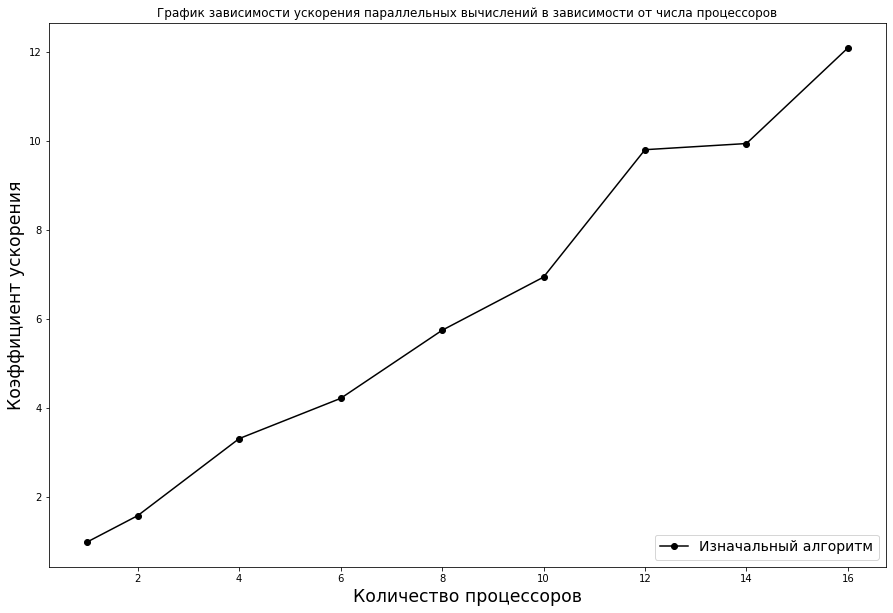

In [12]:
x0 = list()
y0 = list()
x1 = list()
y1 = list()
for line in default_table:
    x0.append(line[0]) # processorCount
    y0.append(line[2]) # acceleration
for line in efficient_table:
    x1.append(line[0]) # processorCount
    y1.append(line[2]) # acceleration
plt.figure(figsize=(15,10))
plt.plot(x0, y0, 'o-', label = "Изначальный алгоритм", color="black")
plt.xlabel('Количество процессоров', size='xx-large')
plt.ylabel("Коэффициент ускорения", size='xx-large')
plt.title("График зависимости ускорения параллельных вычислений в зависимости от числа процессоров")
plt.legend(loc='lower right', fontsize=14)
plt.show()

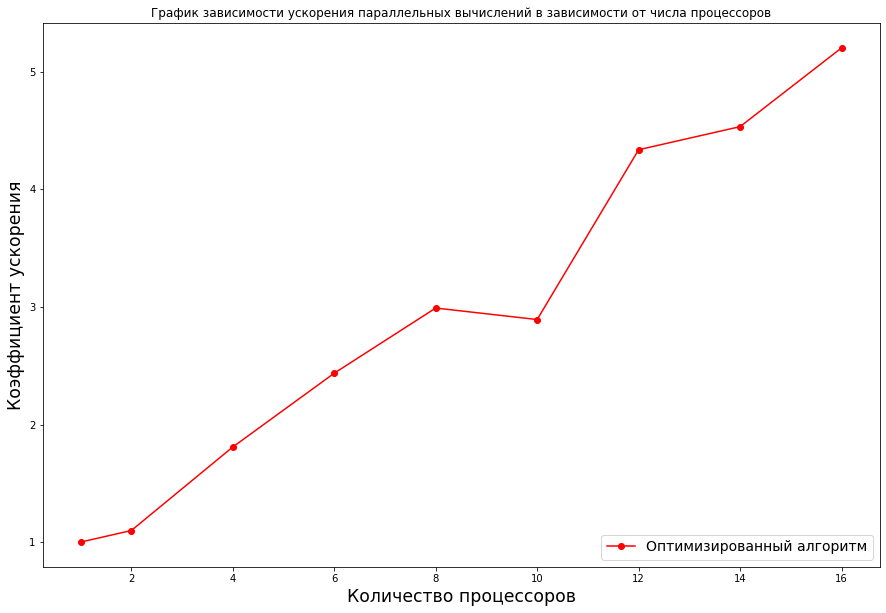

In [13]:
plt.figure(figsize=(15,10))
plt.plot(x1, y1, 'o-', label = "Оптимизированный алгоритм", color="red")
plt.xlabel('Количество процессоров', size='xx-large')
plt.ylabel("Коэффициент ускорения", size='xx-large')
plt.title("График зависимости ускорения параллельных вычислений в зависимости от числа процессоров")
plt.legend(loc='lower right', fontsize=14)
plt.show()

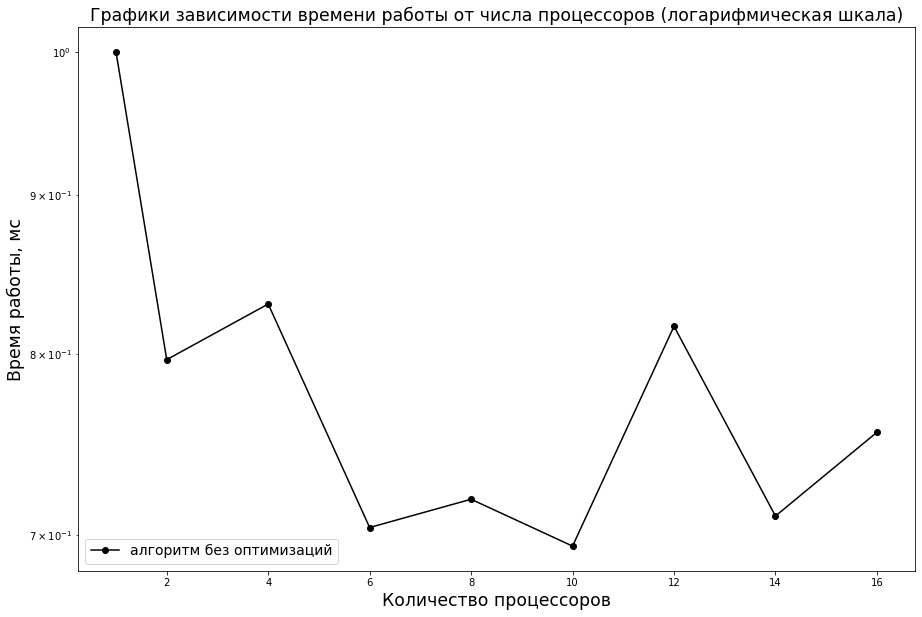

In [14]:
x0 = list()
y0 = list()
x1 = list()
y1 = list()
for line in default_table:
    x0.append(line[0]) # processorCount
    y0.append(line[3]) # acceleration
for line in efficient_table:
    x1.append(line[0]) # processorCount
    y1.append(line[3]) # acceleration
plt.figure(figsize=(15,10))
plt.plot(x0, y0,'o-', label = 'алгоритм без оптимизаций', color="black")
plt.xlabel('Количество процессоров', size='xx-large')
plt.ylabel('Время работы, мс', size='xx-large')
plt.yscale('log')
plt.title( 'Графики зависимости времени работы от числа процессоров (логарифмическая шкала)', size='xx-large' )
plt.legend(loc='lower left', fontsize=14)
plt.show()

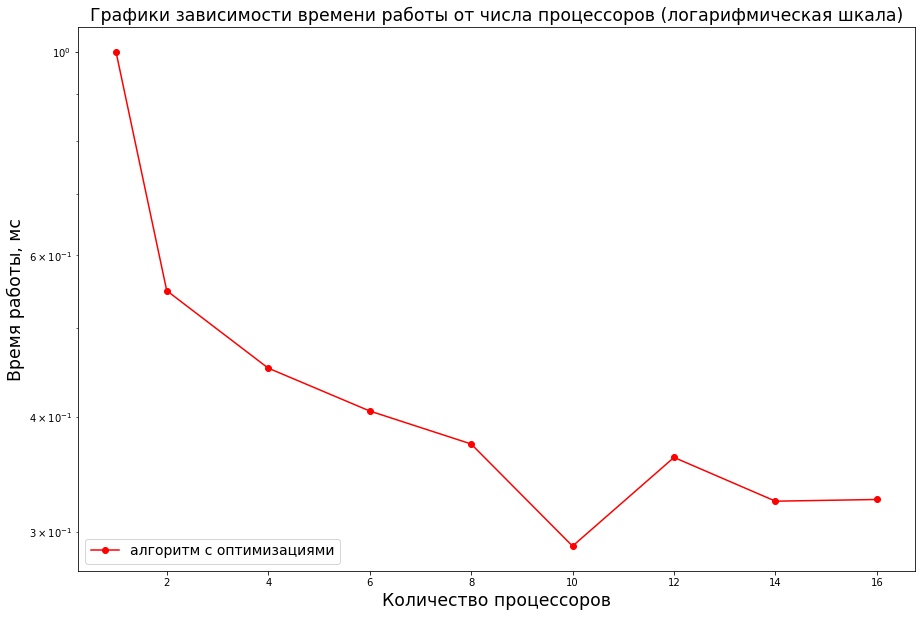

In [15]:
plt.figure(figsize=(15,10))
plt.plot(x1, y1, 'o-', label = 'алгоритм с оптимизациями', color="red")
plt.xlabel('Количество процессоров', size='xx-large')
plt.ylabel('Время работы, мс', size='xx-large')
plt.yscale('log')
plt.title( 'Графики зависимости времени работы от числа процессоров (логарифмическая шкала)', size='xx-large' )
plt.legend(loc='lower left', fontsize=14)
plt.show()


In [16]:
print("Calculating dependency on relative weights")
weights_relations_table = list()
for iteration, relWeight in enumerate(range(10, 110, 10)):
    with open(f"temp_result_data/json/result-3-{relWeight}-1core.json") as json_data_file:
        jdata = json.load(json_data_file)
    t_p_durations = list()
    for row_data in jdata:
        if 'ITER' in row_data:  # skip info line
            continue
        # print(row_data)
        durations = list()
        for i_duration_data in row_data[2:]:
            durations.append(float(i_duration_data)) # append current duration
        t_p_i = max(durations)
        t_p_durations.append(t_p_i)
    t_p_base = np.average(t_p_durations)

    with open(f"temp_result_data/json/result-3-{relWeight}.json") as json_data_file:
        jdata = json.load(json_data_file)
    t_p_durations = list()
    for row_data in jdata:
        if 'ITER' in row_data:  # skip info line
            continue
        # print(row_data)
        durations = list()
        for i_duration_data in row_data[2:]:
            durations.append(float(i_duration_data)) # append current duration
        t_p_i = max(durations)
        t_p_durations.append(t_p_i)
    t_p = np.average(t_p_durations)

    acceleration = t_p_base / t_p
    efficiency = acceleration / 16
    weights_relations_table.append([relWeight, t_p_base, t_p, acceleration, efficiency])
    print(f"relW% {relWeight}\t| {t_p}\t| {efficiency}")

# view table
table_to_view = dict()
table_to_view["Относительное значение целевого веса, %"] = list()
table_to_view["Время работы последовательного алгоритма"] = list()
table_to_view["Время работы параллельного алгоритма"] = list()
table_to_view["Эффективность вычислений"] = list()

for (relWeight, processorWorkTime, manyProcessorsWorkTime, acceleration, efficiency) in weights_relations_table:
    table_to_view["Относительное значение целевого веса, %"].append(relWeight)
    table_to_view["Время работы последовательного алгоритма"].append(processorWorkTime)
    table_to_view["Время работы параллельного алгоритма"].append(manyProcessorsWorkTime)
    table_to_view["Эффективность вычислений"].append(efficiency)
pd.DataFrame.from_dict(table_to_view)


Calculating dependency on relative weights
relW% 10	| 0.09	| 0.18055555555555558
relW% 20	| 6.94	| 0.0982528818443804
relW% 30	| 39.45	| 0.160361216730038
relW% 40	| 83.35	| 0.3188587282543492
relW% 50	| 108.11	| 0.5617542318009435
relW% 60	| 83.69	| 0.3279737722547497
relW% 70	| 39.42	| 0.16271879756468796
relW% 80	| 7.73	| 0.09152652005174644
relW% 90	| 0.18	| 0.052083333333333336
relW% 100	| 0.0	| nan


C:\Users\User\PycharmProjects\knapsTest\venv\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


,"Относительное значение целевого веса, %",Время работы последовательного алгоритма,Время работы параллельного алгоритма,Эффективность вычислений
0,10,0.26,0.09,0.180556
1,20,10.91,6.94,0.098253
2,30,101.22,39.45,0.160361
3,40,425.23,83.35,0.318859
4,50,971.70,108.11,0.561754
5,60,439.17,83.69,0.327974
6,70,102.63,39.42,0.162719
7,80,11.32,7.73,0.091527
8,90,0.15,0.18,0.052083
9,100,0.00,0.00,NaN


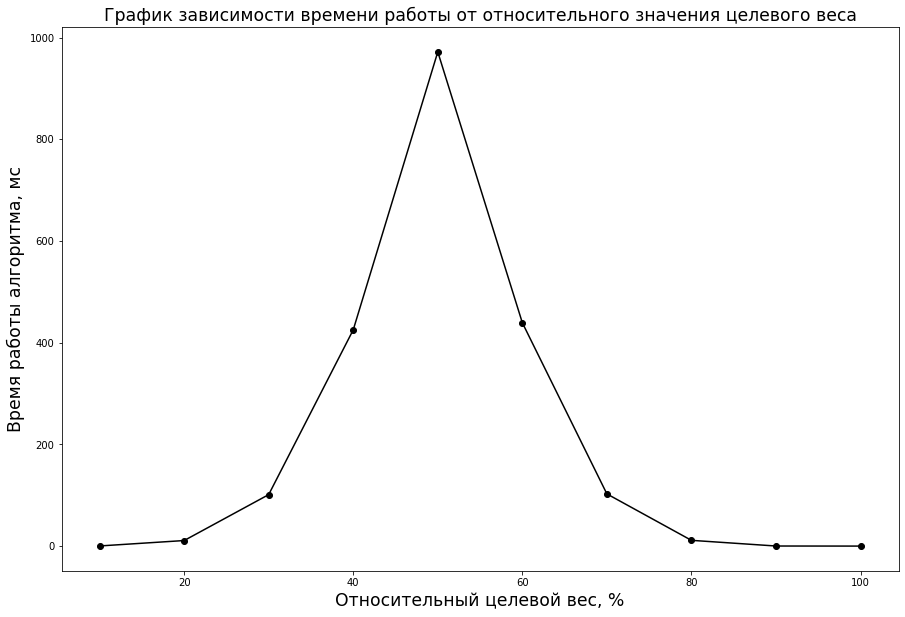

In [17]:
x = list()
y = list()
for line in weights_relations_table:
    x.append(line[0]) # relWeight
    y.append(line[1]) # workingTime
plt.figure(figsize=(15,10))
plt.plot(x, y, 'o-', color="black")
plt.xlabel('Относительный целевой вес, %', size='xx-large')
plt.ylabel('Время работы алгоритма, мс', size='xx-large')
plt.title( 'График зависимости времени работы от относительного значения целевого веса', size='xx-large' )
plt.show()

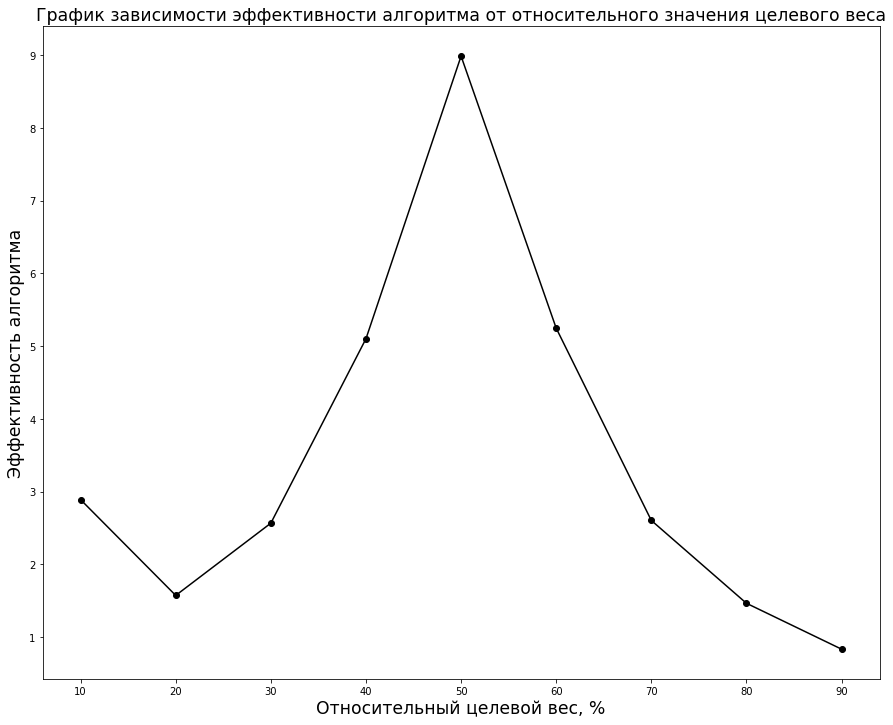

In [18]:
x = list()
y = list()
for line in weights_relations_table:
    x.append(line[0]) # relWeight
    y.append(line[3]) # efficiency
plt.figure(figsize=(15,12))
plt.plot(x, y,'o-', color="black")
plt.xlabel('Относительный целевой вес, %', size='xx-large')
plt.ylabel('Эффективность алгоритма', size='xx-large')
plt.title( 'График зависимости эффективности алгоритма от относительного значения целевого веса', size='xx-large' )
plt.show()


In [19]:
print("Calculating relative load per cores")
result_duration = dict()

with open(f"temp_result_data/json/result-3-50.json") as json_data_file:
    jdata = json.load(json_data_file)
t_p_durations = list()
for row_data in jdata:
    if 'ITER' in row_data:  # skip info line
        continue
    # print(row_data)
    durations = dict()
    for processor_number, i_duration_data in enumerate(row_data[2:]):
        if processor_number not in durations.keys():
            durations[processor_number] = list()
        durations[processor_number].append(float(i_duration_data)) # append current duration
    for processor_number in durations.keys():
        result_duration[processor_number] = np.average(durations[processor_number])

Calculating relative load per cores


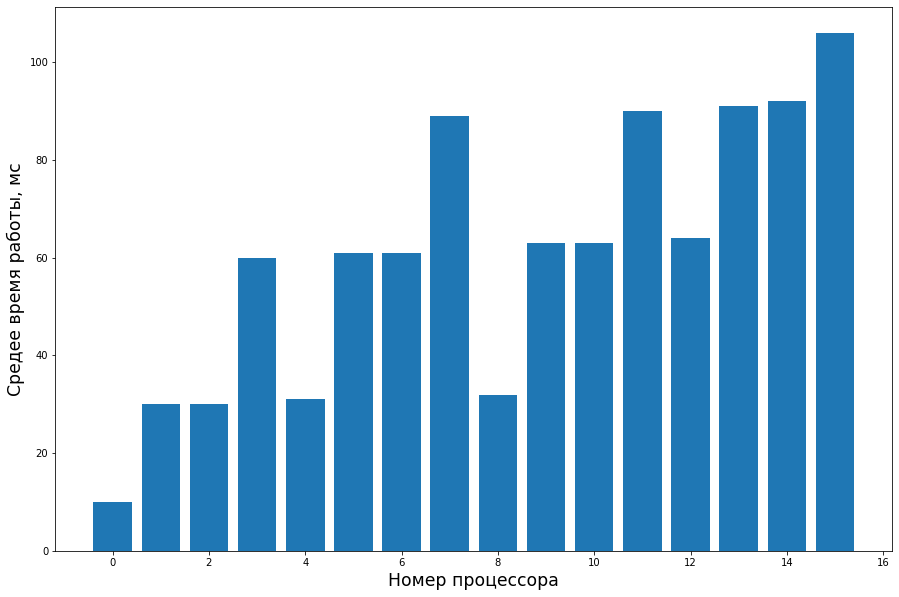

In [20]:
plt.figure(figsize=(15,10))
plt.bar( result_duration.keys(), result_duration.values() )
plt.xlabel('Номер процессора', size="xx-large")
plt.ylabel('Средее время работы, мс', size="xx-large")
plt.show()